# BB84 Implementation

In [ ]:
!pip install qiskit
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=566d7644d34caf49c9571df8cc55e4d67e5623b1a72c3c333b77ef4336749155
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
#Number of qubits and size of the key
n = 8

# Generating n random qbits

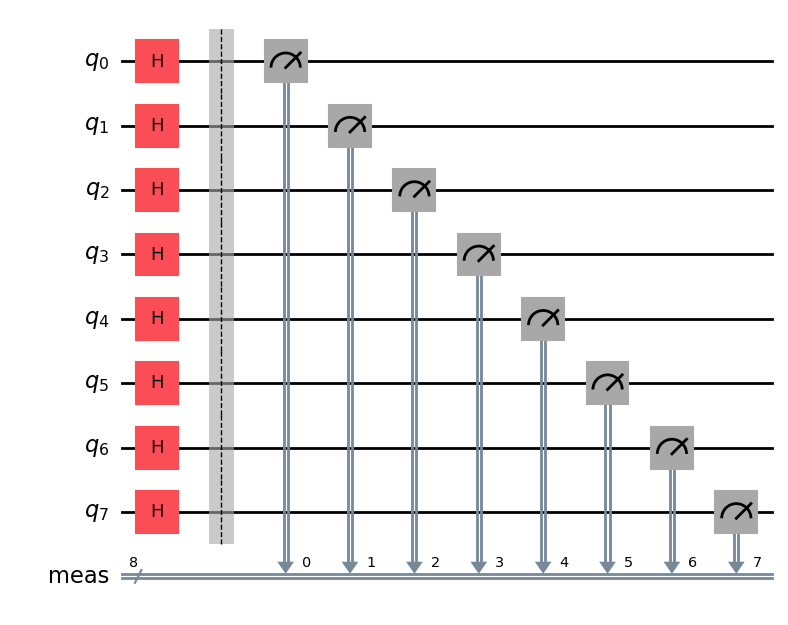

In [ ]:
from qiskit import QuantumCircuit

from qiskit.providers.fake_provider import GenericBackendV2

from qiskit import transpile

backend = GenericBackendV2(num_qubits=n)

qc_a = QuantumCircuit(n)
for i in range(n):
  qc_a.h(i)
qc_a.measure_all()
qc_a.draw("mpl")


In [ ]:
def getRandomBitSequence():
  backend = GenericBackendV2(num_qubits=n)
  qc_a = QuantumCircuit(n)
  for i in range(n):
    qc_a.h(i)
  qc_a.measure_all()
  new_circuit = transpile(qc_a, backend)
  job = backend.run(new_circuit, shots=1)
  result=job.result()
  counts = result.get_counts(qc_a)
  value=next(iter(counts))
  return value


# Alice generates two random bit sequences using a quantum computer.

In [ ]:
a=getRandomBitSequence()
b=getRandomBitSequence()
print(a)
print(b)

01110101
01100001


/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:500: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


# Then, she encodes the first one using the second one as a basis. These encoded qubits are sent to Bob

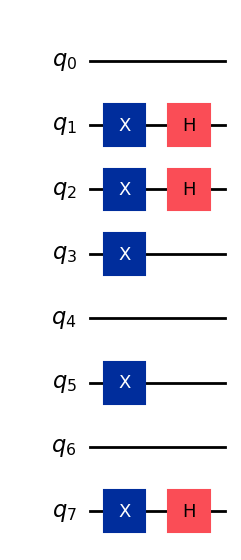

In [ ]:
qc_e = QuantumCircuit(n)
for i in range(n):
  if(b[i]=='0'):
    if(a[i]=='1'):
      qc_e.x(i)
  else:
    if(a[i]=='0'):
      qc_e.h(i)
    else:
      qc_e.x(i)
      qc_e.h(i)
qc_e.draw("mpl")

# Bob generates a random bit sequence also using a quantum computer

In [ ]:
b2=getRandomBitSequence()
print(b2)

10110000


# Now he encodes the received bits according to his random bit sequence. The circuit is then measured by Bob

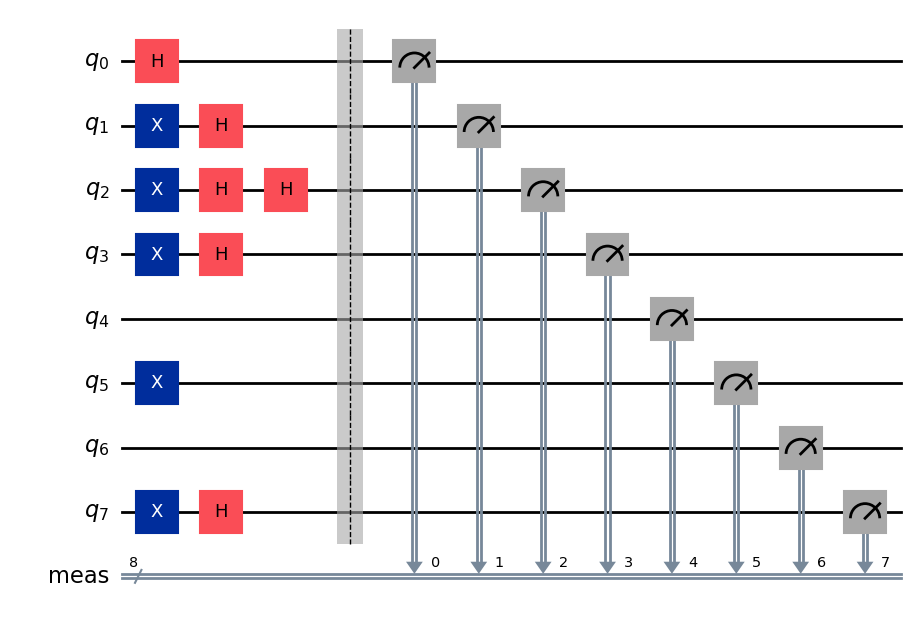

In [ ]:
for i in range(n):
  if b2[i]=='1':
    qc_e.h(i)
qc_e.measure_all()
qc_e.draw("mpl")


In [ ]:
new_circuit = transpile(qc_e, backend)
job = backend.run(new_circuit, shots=1)
result=job.result()
counts = result.get_counts(qc_e)
value=next(iter(counts))


In [ ]:
print(value)

10101101


# Now Alice and Bob compare their b and b' values to check which of those were similar

In [ ]:
sharedKeyBob = ''
sharedKeyAlice=''
for i in range(n):
    if b[i] == b2[i]:
        # Since Qiskit's result string is reversed compared to the qubit order, use n-1-i to access the correct bit.
        sharedKeyBob+=value[::-1][i]
        sharedKeyAlice+=a[i]
print(sharedKeyBob)
print(sharedKeyAlice)

1010
1010
